# Regresiones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Carga y Visualización de los datos

In [2]:
imacec = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/publicaciones/main/prediccion-imacec/Imacec.csv')
imacec.columns = ['fecha', 'imacec']
imacec = imacec.dropna()
imacec['fecha'] = pd.to_datetime(imacec['fecha'], dayfirst=True)
imacec.tail()

,fecha,imacec
298,2020-11-01,0.978118
299,2020-12-01,-0.071983
300,2021-01-01,-2.837020
301,2021-02-01,-2.230107
302,2021-03-01,6.395454


In [3]:
ipeco = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/CEEN%20UDD%20IPECO.csv')
ipeco.columns = ['fecha', 'ipeco', 'coyuntura', 'expectativas', 'ipeco-sea', 'ipeco-da', 'ipeco-sef', 'ipeco-df', 'ipeco-if', 'ipeco-m3']
ipeco = ipeco[['fecha', 'ipeco', 'ipeco-sea', 'ipeco-da', 'ipeco-sef', 'ipeco-df', 'ipeco-if']]
ipeco['fecha'] = pd.to_datetime(ipeco['fecha'], dayfirst=True)
ipeco.tail()



,fecha,ipeco,ipeco-sea,ipeco-da,ipeco-sef,ipeco-df,ipeco-if
201,2020-12-01,66.987987,58.740526,80.119287,66.010929,82.430523,60.268885
202,2021-01-01,70.941959,56.303419,103.987953,78.534279,76.075351,60.349190
203,2021-02-01,86.890132,70.970696,137.805173,87.763363,105.542153,69.841868
204,2021-03-01,80.562027,51.903942,133.211667,82.546979,105.494734,65.929263
205,2021-04-01,52.248795,35.568193,69.676773,54.504512,63.636364,48.792962


In [4]:
ipec = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/GFK%20ADIMARK%20IPEC.csv')
ipec.columns = ['fecha', 'ipec-sepa', 'ipec-sena', 'ipec-sena12m', 'ipec-sena5y', 'ipec-ec', 'ipec']
ipec['fecha'] = pd.to_datetime(ipec['fecha'], dayfirst=True)
ipec.tail()

,fecha,ipec-sepa,ipec-sena,ipec-sena12m,ipec-sena5y,ipec-ec,ipec
225,2020-12-01,26.916153,26.184008,37.701656,22.053846,36.371532,29.845440
226,2021-01-01,27.732677,27.048832,37.063938,23.188694,32.412163,29.489262
227,2021-02-01,29.124720,30.429945,43.852360,23.494522,32.967945,31.973898
228,2021-03-01,25.384239,28.663019,39.274822,23.418276,29.205111,29.189093
229,2021-04-01,22.900463,22.300762,34.152779,23.106691,22.041729,24.900484


In [5]:
ice = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/CEEN%20UDD%20ICE.csv')
ice.columns = ['fecha', 'ice', 'ice-m3', 'ice-agricola', 'ice-comercio', 'ice-construccion','ice-financiero', 'ice-industria', 'ice-mineria']
ice = ice[['fecha', 'ice', 'ice-agricola', 'ice-comercio', 'ice-construccion','ice-financiero', 'ice-industria', 'ice-mineria']]
ice['fecha'] = pd.to_datetime(ice['fecha'], dayfirst=True)
ice.tail()



,fecha,ice,ice-agricola,ice-comercio,ice-construccion,ice-financiero,ice-industria,ice-mineria
198,2020-12-01,5.405124,18.823529,8.309881,2.296791,-43.750000,21.409722,8.204861
199,2021-01-01,1.652625,6.844920,7.983970,-21.180036,-3.125000,13.612599,-1.288889
200,2021-02-01,9.014656,-11.764706,10.674966,-5.529412,25.000000,21.418651,1.833333
201,2021-03-01,6.794963,12.727273,3.030249,11.961230,-21.875000,8.273810,17.215278
202,2021-04-01,-3.509817,-17.647059,5.150985,12.183601,-45.833333,15.651290,-15.611111


In [6]:
imce = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/ICARE%20UAI%20IMCE.csv')
imce.columns = ['fecha', 'imce-comercio', 'imce-construccion', 'imce-industria', 'imce-mineria', 'imce', 'imce-sm']
imce = imce[['fecha', 'imce-comercio', 'imce-construccion', 'imce-industria', 'imce-mineria', 'imce']]
imce['fecha'] = pd.to_datetime(imce['fecha'], dayfirst=True)
imce.tail()

,fecha,imce-comercio,imce-construccion,imce-industria,imce-mineria,imce
205,2020-12-01,56.231884,41.666667,49.833333,39.553456,48.000463
206,2021-01-01,56.956522,40.079365,54.395604,64.879038,54.379643
207,2021-02-01,58.404558,44.230769,56.105611,62.604000,55.721718
208,2021-03-01,61.016949,48.550725,58.108108,51.730401,55.875158
209,2021-04-01,56.533333,44.791667,52.212389,49.474696,51.416693


In [7]:
data = imacec.merge(ipeco, on='fecha', how='outer')
data = data.merge(ipec, on='fecha', how='outer')
data = data.merge(ice, on='fecha', how='outer')
data = data.merge(imce, on='fecha', how='outer')
data.tail()

,fecha,imacec,ipeco,ipeco-sea,ipeco-da,ipeco-sef,ipeco-df,ipeco-if,ipec-sepa,ipec-sena,...,ice-comercio,ice-construccion,ice-financiero,ice-industria,ice-mineria,imce-comercio,imce-construccion,imce-industria,imce-mineria,imce
287,2020-12-01,-0.071983,66.987987,58.740526,80.119287,66.010929,82.430523,60.268885,26.916153,26.184008,...,8.309881,2.296791,-43.750000,21.409722,8.204861,56.231884,41.666667,49.833333,39.553456,48.000463
288,2021-01-01,-2.837020,70.941959,56.303419,103.987953,78.534279,76.075351,60.349190,27.732677,27.048832,...,7.983970,-21.180036,-3.125000,13.612599,-1.288889,56.956522,40.079365,54.395604,64.879038,54.379643
289,2021-02-01,-2.230107,86.890132,70.970696,137.805173,87.763363,105.542153,69.841868,29.124720,30.429945,...,10.674966,-5.529412,25.000000,21.418651,1.833333,58.404558,44.230769,56.105611,62.604000,55.721718
290,2021-03-01,6.395454,80.562027,51.903942,133.211667,82.546979,105.494734,65.929263,25.384239,28.663019,...,3.030249,11.961230,-21.875000,8.273810,17.215278,61.016949,48.550725,58.108108,51.730401,55.875158
291,2021-04-01,NaN,52.248795,35.568193,69.676773,54.504512,63.636364,48.792962,22.900463,22.300762,...,5.150985,12.183601,-45.833333,15.651290,-15.611111,56.533333,44.791667,52.212389,49.474696,51.416693


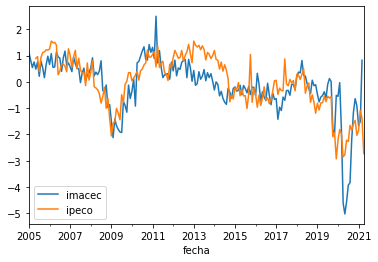

In [8]:
imacec_ipeco = data[['fecha', 'imacec', 'ipeco']]
imacec_ipeco = imacec_ipeco.set_index('fecha')
imacec_ipeco = (imacec_ipeco - imacec_ipeco.mean()) / imacec_ipeco.std()
imacec_ipeco = imacec_ipeco.loc['2005':]
imacec_ipeco.plot()
plt.legend(loc='lower left')

<AxesSubplot:>

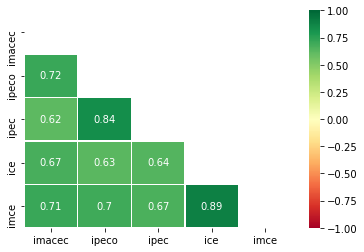

In [9]:
corr_mat = data[['imacec', 'ipeco', 'ipec', 'ice', 'imce']].corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True

fig, ax =plt.subplots()
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=-1, vmax=1)

In [10]:
data = data.set_index('fecha', drop=True)
data.tail()

,imacec,ipeco,ipeco-sea,ipeco-da,ipeco-sef,ipeco-df,ipeco-if,ipec-sepa,ipec-sena,ipec-sena12m,...,ice-comercio,ice-construccion,ice-financiero,ice-industria,ice-mineria,imce-comercio,imce-construccion,imce-industria,imce-mineria,imce
fecha,,,,,,,,,,,,,,,,,,,,,
2020-12-01,-0.071983,66.987987,58.740526,80.119287,66.010929,82.430523,60.268885,26.916153,26.184008,37.701656,...,8.309881,2.296791,-43.750000,21.409722,8.204861,56.231884,41.666667,49.833333,39.553456,48.000463
2021-01-01,-2.837020,70.941959,56.303419,103.987953,78.534279,76.075351,60.349190,27.732677,27.048832,37.063938,...,7.983970,-21.180036,-3.125000,13.612599,-1.288889,56.956522,40.079365,54.395604,64.879038,54.379643
2021-02-01,-2.230107,86.890132,70.970696,137.805173,87.763363,105.542153,69.841868,29.124720,30.429945,43.852360,...,10.674966,-5.529412,25.000000,21.418651,1.833333,58.404558,44.230769,56.105611,62.604000,55.721718
2021-03-01,6.395454,80.562027,51.903942,133.211667,82.546979,105.494734,65.929263,25.384239,28.663019,39.274822,...,3.030249,11.961230,-21.875000,8.273810,17.215278,61.016949,48.550725,58.108108,51.730401,55.875158
2021-04-01,NaN,52.248795,35.568193,69.676773,54.504512,63.636364,48.792962,22.900463,22.300762,34.152779,...,5.150985,12.183601,-45.833333,15.651290,-15.611111,56.533333,44.791667,52.212389,49.474696,51.416693


# Preprocesamiento, funciones y dataframes para guardar los resultados

In [11]:
# Función para calcular las métricas de evaluación. 
def get_metrics(indice, y_test, y_pred):
    return pd.DataFrame({
                'CV_RMSE': np.sqrt(np.abs(searcher.best_score_)),
                'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
                'MAE': mean_absolute_error(y_test, y_pred),
                'R2': r2_score(y_test, y_pred)},
                index=[indice])

In [12]:
# DataFrames vacíos para almacenar los resultados 
results = pd.DataFrame()
parametros = pd.DataFrame()
samples = pd.DataFrame()

In [13]:
# Variables X e y
X = data.drop(['imacec'], axis=1)
y = data['imacec']


In [14]:
# Train y Test sets
X_train0 = X.iloc[:-1]
X_test0 = X.iloc[[-1]]
y_train0 = y.iloc[:-1]

print(
    'X_train shape:', X_train0.shape,
    'X_test shape:', X_test0.shape,
    'y_train shape:', y_train0.shape)

X_train shape: (291, 24) X_test shape: (1, 24) y_train shape: (291,)


In [15]:
# Variables de cada modelo
vipeco = ['ipeco', 'ipeco-sea', 'ipeco-da', 'ipeco-sef', 'ipeco-df', 'ipeco-if']
vipec = ['ipec-sepa', 'ipec-sena', 'ipec-sena12m', 'ipec-sena5y', 'ipec-ec', 'ipec']
vice = ['ice', 'ice-agricola', 'ice-comercio', 'ice-construccion','ice-financiero', 'ice-industria', 'ice-mineria']
vimce = ['imce-comercio', 'imce-construccion', 'imce-industria', 'imce-mineria', 'imce']
vconsumidores = ['ipeco', 'ipeco-sea', 'ipeco-da', 'ipeco-sef', 'ipeco-df', 'ipeco-if', 'ipec-sepa', 'ipec-sena', 'ipec-sena12m', 'ipec-sena5y', 'ipec-ec', 'ipec']
vempresarios = ['ice', 'ice-agricola', 'ice-comercio', 'ice-construccion','ice-financiero', 'ice-industria', 'ice-mineria', 'imce-comercio', 'imce-construccion', 'imce-industria', 'imce-mineria', 'imce']


In [16]:
def gen_X_train(variables):
    X_train = X_train0[variables].dropna()
    X_test = X_test0[variables]
    y_train = y_train0[X_train.index]
    print('X_train shape:', X_train.shape, '||', 'X_test shape:', X_test.shape, '||', 'y_train shape:', y_train.shape)

    return X_train, X_test, y_train

# IPECO

In [17]:
indice = 'IPECO'
X_train, X_test, y_train = gen_X_train(vipeco)
samples = samples.append(pd.DataFrame({'rows': X_train.shape[0], 'cols': X_train.shape[1]}, index=[indice]))

X_train shape: (205, 6) || X_test shape: (1, 6) || y_train shape: (205,)


In [18]:
model = xgb.XGBRegressor(random_state=123)
params = {'colsample_bytree': [0.5, 1.0],
          'n_estimators': [100, 200, 300],
          'max_depth': [2, 3, 4],
          'eta': [0.01, 0.1],
          'min_child_weight': [9, 12]}
searcher = GridSearchCV(estimator=model, 
                        param_grid=params, 
                        scoring='neg_mean_squared_error', 
                        cv=4, 
                        verbose=1,
                        n_jobs=-1)
searcher.fit(X_train, y_train)
print("Best CV params", searcher.best_params_)
parametros = parametros.append(pd.DataFrame(searcher.best_params_, index=[indice]))

best_model = searcher.best_estimator_
y_train_pred = best_model.predict(X_train)

results = results.append(get_metrics(indice, y_train, y_train_pred))
results.round(4)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
[14:08:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best CV params {'colsample_bytree': 1.0, 'eta': 0.01, 'max_depth': 2, 'min_child_weight': 12, 'n_estimators': 200}


,CV_RMSE,RMSE,MAE,R2
IPECO,2.9374,1.5372,1.1211,0.8369


# IPEC

In [19]:
indice = 'IPEC'
X_train, X_test, y_train = gen_X_train(vipec)
samples = samples.append(pd.DataFrame({'rows': X_train.shape[0], 'cols': X_train.shape[1]}, index=[indice]))

X_train shape: (229, 6) || X_test shape: (1, 6) || y_train shape: (229,)


In [20]:
model = xgb.XGBRegressor(random_state=123)
params = {'colsample_bytree': [0.5, 1.0],
          'n_estimators': [100, 200, 300],
          'max_depth': [2, 3, 4],
          'eta': [0.01, 0.1],
          'min_child_weight': [9, 12]}
searcher = GridSearchCV(estimator=model, 
                        param_grid=params, 
                        scoring='neg_mean_squared_error', 
                        cv=4, 
                        verbose=1,
                        n_jobs=-1)
searcher.fit(X_train, y_train)
print("Best CV params", searcher.best_params_)
parametros = parametros.append(pd.DataFrame(searcher.best_params_, index=[indice]))

best_model = searcher.best_estimator_
y_train_pred = best_model.predict(X_train)

results = results.append(get_metrics(indice, y_train, y_train_pred))
results.round(4)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
[14:08:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best CV params {'colsample_bytree': 0.5, 'eta': 0.01, 'max_depth': 2, 'min_child_weight': 9, 'n_estimators': 100}


,CV_RMSE,RMSE,MAE,R2
IPECO,2.9374,1.5372,1.1211,0.8369
IPEC,3.5011,1.6077,1.2422,0.8136


# ICE

In [21]:
indice = 'ICE'
X_train, X_test, y_train = gen_X_train(vice)
samples = samples.append(pd.DataFrame({'rows': X_train.shape[0], 'cols': X_train.shape[1]}, index=[indice]))

X_train shape: (189, 7) || X_test shape: (1, 7) || y_train shape: (189,)


In [22]:
model = xgb.XGBRegressor(random_state=123)
params = {'colsample_bytree': [0.5, 1.0],
          'n_estimators': [100, 200, 300],
          'max_depth': [2, 3, 4],
          'eta': [0.01, 0.1],
          'min_child_weight': [9, 12]}
searcher = GridSearchCV(estimator=model, 
                        param_grid=params, 
                        scoring='neg_mean_squared_error', 
                        cv=4, 
                        verbose=1,
                        n_jobs=-1)
searcher.fit(X_train, y_train)
print("Best CV params", searcher.best_params_)
parametros = parametros.append(pd.DataFrame(searcher.best_params_, index=[indice]))

best_model = searcher.best_estimator_
y_train_pred = best_model.predict(X_train)

results = results.append(get_metrics(indice, y_train, y_train_pred))
results.round(4)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
[14:08:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best CV params {'colsample_bytree': 0.5, 'eta': 0.01, 'max_depth': 2, 'min_child_weight': 12, 'n_estimators': 100}


,CV_RMSE,RMSE,MAE,R2
IPECO,2.9374,1.5372,1.1211,0.8369
IPEC,3.5011,1.6077,1.2422,0.8136
ICE,3.5678,1.6783,1.2493,0.8119


# IMCE

In [23]:
indice = 'IMCE'
X_train, X_test, y_train = gen_X_train(vimce)
samples = samples.append(pd.DataFrame({'rows': X_train.shape[0], 'cols': X_train.shape[1]}, index=[indice]))

X_train shape: (209, 5) || X_test shape: (1, 5) || y_train shape: (209,)


In [24]:
model = xgb.XGBRegressor(random_state=123)
params = {'colsample_bytree': [0.5, 1.0],
          'n_estimators': [100, 200, 300],
          'max_depth': [2, 3, 4],
          'eta': [0.01, 0.1],
          'min_child_weight': [9, 12]}
searcher = GridSearchCV(estimator=model, 
                        param_grid=params, 
                        scoring='neg_mean_squared_error', 
                        cv=4, 
                        verbose=1,
                        n_jobs=-1)
searcher.fit(X_train, y_train)
print("Best CV params", searcher.best_params_)
parametros = parametros.append(pd.DataFrame(searcher.best_params_, index=[indice]))

best_model = searcher.best_estimator_
y_train_pred = best_model.predict(X_train)

results = results.append(get_metrics(indice, y_train, y_train_pred))
results.round(4)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
[14:08:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best CV params {'colsample_bytree': 1.0, 'eta': 0.01, 'max_depth': 2, 'min_child_weight': 12, 'n_estimators': 100}


,CV_RMSE,RMSE,MAE,R2
IPECO,2.9374,1.5372,1.1211,0.8369
IPEC,3.5011,1.6077,1.2422,0.8136
ICE,3.5678,1.6783,1.2493,0.8119
IMCE,3.4451,1.9369,1.3818,0.7509


# Confianza de los consumidores

In [25]:
indice = 'Consumidores'
X_train, X_test, y_train = gen_X_train(vconsumidores)
samples = samples.append(pd.DataFrame({'rows': X_train.shape[0], 'cols': X_train.shape[1]}, index=[indice]))

X_train shape: (204, 12) || X_test shape: (1, 12) || y_train shape: (204,)


In [26]:
model = xgb.XGBRegressor(random_state=123)
params = {'colsample_bytree': [0.35, 0.5, 0.67],
          'n_estimators': [100, 200, 300],
          'max_depth': [2, 3, 4],
          'eta': [0.01, 0.1],
          'min_child_weight': [9, 12]}
searcher = GridSearchCV(estimator=model, 
                        param_grid=params, 
                        scoring='neg_mean_squared_error', 
                        cv=4, 
                        verbose=1,
                        n_jobs=-1)
searcher.fit(X_train, y_train)
print("Best CV params", searcher.best_params_)
parametros = parametros.append(pd.DataFrame(searcher.best_params_, index=[indice]))

best_model = searcher.best_estimator_
y_train_pred = best_model.predict(X_train)

results = results.append(get_metrics(indice, y_train, y_train_pred))
results.round(4)

Fitting 4 folds for each of 108 candidates, totalling 432 fits
[14:09:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best CV params {'colsample_bytree': 0.5, 'eta': 0.01, 'max_depth': 2, 'min_child_weight': 12, 'n_estimators': 100}


,CV_RMSE,RMSE,MAE,R2
IPECO,2.9374,1.5372,1.1211,0.8369
IPEC,3.5011,1.6077,1.2422,0.8136
ICE,3.5678,1.6783,1.2493,0.8119
IMCE,3.4451,1.9369,1.3818,0.7509
Consumidores,3.1198,1.5509,1.1460,0.8347


# Confianza empresarial

In [27]:
indice = 'Empresarios'
X_train, X_test, y_train = gen_X_train(vempresarios)
samples = samples.append(pd.DataFrame({'rows': X_train.shape[0], 'cols': X_train.shape[1]}, index=[indice]))

X_train shape: (189, 12) || X_test shape: (1, 12) || y_train shape: (189,)


In [28]:
model = xgb.XGBRegressor(random_state=123)
params = {'colsample_bytree': [0.35, 0.5, 0.67],
          'n_estimators': [100, 200, 300],
          'max_depth': [2, 3, 4],
          'eta': [0.01, 0.1],
          'min_child_weight': [9, 12]}
searcher = GridSearchCV(estimator=model, 
                        param_grid=params, 
                        scoring='neg_mean_squared_error', 
                        cv=4, 
                        verbose=1,
                        n_jobs=-1)
searcher.fit(X_train, y_train)
print("Best CV params", searcher.best_params_)
parametros = parametros.append(pd.DataFrame(searcher.best_params_, index=[indice]))

best_model = searcher.best_estimator_
y_train_pred = best_model.predict(X_train)

results = results.append(get_metrics(indice, y_train, y_train_pred))
results.round(4)

Fitting 4 folds for each of 108 candidates, totalling 432 fits
[14:09:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best CV params {'colsample_bytree': 0.5, 'eta': 0.01, 'max_depth': 2, 'min_child_weight': 12, 'n_estimators': 100}


,CV_RMSE,RMSE,MAE,R2
IPECO,2.9374,1.5372,1.1211,0.8369
IPEC,3.5011,1.6077,1.2422,0.8136
ICE,3.5678,1.6783,1.2493,0.8119
IMCE,3.4451,1.9369,1.3818,0.7509
Consumidores,3.1198,1.5509,1.1460,0.8347
Empresarios,3.3278,1.4163,1.0478,0.8660


# Todos los índices

In [29]:
indice = 'Todos'
X_train, X_test, y_train = gen_X_train(X_train0.columns)
samples = samples.append(pd.DataFrame({'rows': X_train.shape[0], 'cols': X_train.shape[1]}, index=[indice]))

X_train shape: (189, 24) || X_test shape: (1, 24) || y_train shape: (189,)


In [30]:
model = xgb.XGBRegressor(random_state=123)
params = {'colsample_bytree': [0.17, 0.34, 0.5, 0.75],
          'n_estimators': [100, 200, 300],
          'max_depth': [2, 3, 4],
          'eta': [0.01, 0.1],
          'min_child_weight': [9, 12]}
searcher = GridSearchCV(estimator=model, 
                        param_grid=params, 
                        scoring='neg_mean_squared_error', 
                        cv=4, 
                        verbose=1,
                        n_jobs=-1)
searcher.fit(X_train, y_train)
print("Best CV params", searcher.best_params_)
parametros = parametros.append(pd.DataFrame(searcher.best_params_, index=[indice]))

best_model = searcher.best_estimator_
y_train_pred = best_model.predict(X_train)

results = results.append(get_metrics(indice, y_train, y_train_pred))
results.round(4)

Fitting 4 folds for each of 144 candidates, totalling 576 fits
[14:09:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best CV params {'colsample_bytree': 0.17, 'eta': 0.01, 'max_depth': 2, 'min_child_weight': 9, 'n_estimators': 100}


,CV_RMSE,RMSE,MAE,R2
IPECO,2.9374,1.5372,1.1211,0.8369
IPEC,3.5011,1.6077,1.2422,0.8136
ICE,3.5678,1.6783,1.2493,0.8119
IMCE,3.4451,1.9369,1.3818,0.7509
Consumidores,3.1198,1.5509,1.1460,0.8347
Empresarios,3.3278,1.4163,1.0478,0.8660
Todos,3.0443,1.0012,0.7719,0.9330


# Evaluación parcial según resultados en CV y train set

In [31]:
samples

,rows,cols
IPECO,205,6
IPEC,229,6
ICE,189,7
IMCE,209,5
Consumidores,204,12
Empresarios,189,12
Todos,189,24


In [32]:
parametros

,colsample_bytree,eta,max_depth,min_child_weight,n_estimators
IPECO,1.00,0.01,2,12,200
IPEC,0.50,0.01,2,9,100
ICE,0.50,0.01,2,12,100
IMCE,1.00,0.01,2,12,100
Consumidores,0.50,0.01,2,12,100
Empresarios,0.50,0.01,2,12,100
Todos,0.17,0.01,2,9,100


In [34]:
results.round(4)

,CV_RMSE,RMSE,MAE,R2
IPECO,2.9374,1.5372,1.1211,0.8369
IPEC,3.5011,1.6077,1.2422,0.8136
ICE,3.5678,1.6783,1.2493,0.8119
IMCE,3.4451,1.9369,1.3818,0.7509
Consumidores,3.1198,1.5509,1.1460,0.8347
Empresarios,3.3278,1.4163,1.0478,0.8660
Todos,3.0443,1.0012,0.7719,0.9330


In [31]:
print('Best models:')
print(results[['CV_RMSE', 'RMSE', 'MAE']].idxmin(), '\n')
print('Best R2:')
print(results['R2'].idxmax(), '\n')
results

Best models:
CV_RMSE    IPECO
RMSE       Todos
MAE        Todos
dtype: object 

Best R2:
Todos 



,CV_RMSE,RMSE,MAE,R2
IPECO,2.937410,1.537241,1.121088,0.836920
IPEC,3.501105,1.607652,1.242245,0.813573
ICE,3.567828,1.678288,1.249260,0.811880
IMCE,3.445071,1.936883,1.381771,0.750854
Consumidores,3.119791,1.550931,1.145957,0.834707
Empresarios,3.327831,1.416314,1.047833,0.866026
Todos,3.044266,1.001244,0.771923,0.933045


In [32]:
(results['CV_RMSE'] / results['RMSE']).round(2)

IPECO           1.91
IPEC            2.18
ICE             2.13
IMCE            1.78
Consumidores    2.01
Empresarios     2.35
Todos           3.04
dtype: float64

# Ajuste de los modelos con muestra completa

In [35]:
parametros

,colsample_bytree,eta,max_depth,min_child_weight,n_estimators
IPECO,1.00,0.01,2,12,200
IPEC,0.50,0.01,2,9,100
ICE,0.50,0.01,2,12,100
IMCE,1.00,0.01,2,12,100
Consumidores,0.50,0.01,2,12,100
Empresarios,0.50,0.01,2,12,100
Todos,0.17,0.01,2,9,100


In [36]:
predicciones = pd.DataFrame()

X_train shape: (205, 6) || X_test shape: (1, 6) || y_train shape: (205,)
[15:07:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


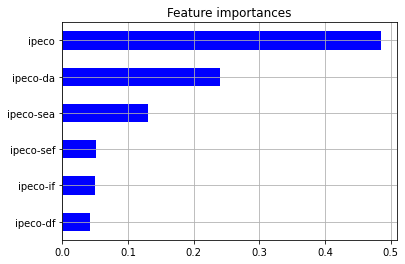

In [37]:
indice = 'IPECO'
X_train, X_test, y_train = gen_X_train(vipeco)

model = xgb.XGBRegressor(colsample_bytree=parametros.loc[indice][0], 
                        eta=parametros.loc[indice][1],  
                        max_depth=parametros.loc[indice][2].astype(int), 
                        min_child_weight=parametros.loc[indice][3].astype(int), 
                        n_estimators=parametros.loc[indice][4].astype(int))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predicciones = predicciones.append(pd.DataFrame(y_pred, index=[indice], columns=['Imacec']))

importances_xgcl = pd.Series(model.feature_importances_, index=X_train.columns)
sorted_importances_xgcl = importances_xgcl.sort_values()
sorted_importances_xgcl.plot(kind='barh', color='blue')
plt.title('Feature importances')
plt.grid()
plt.show()


X_train shape: (229, 6) || X_test shape: (1, 6) || y_train shape: (229,)
[15:07:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


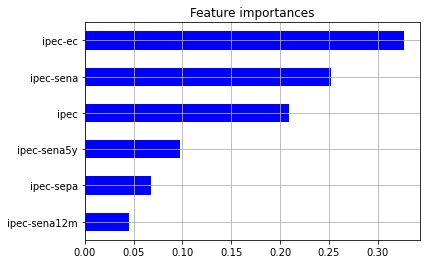

In [38]:
indice = 'IPEC'
X_train, X_test, y_train = gen_X_train(vipec)

model = xgb.XGBRegressor(colsample_bytree=parametros.loc[indice][0], 
                        eta=parametros.loc[indice][1],  
                        max_depth=parametros.loc[indice][2].astype(int), 
                        min_child_weight=parametros.loc[indice][3].astype(int), 
                        n_estimators=parametros.loc[indice][4].astype(int))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predicciones = predicciones.append(pd.DataFrame(y_pred, index=[indice], columns=['Imacec']))

importances_xgcl = pd.Series(model.feature_importances_, index=X_train.columns)
sorted_importances_xgcl = importances_xgcl.sort_values()
sorted_importances_xgcl.plot(kind='barh', color='blue')
plt.title('Feature importances')
plt.grid()
plt.show()

X_train shape: (189, 7) || X_test shape: (1, 7) || y_train shape: (189,)
[15:07:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


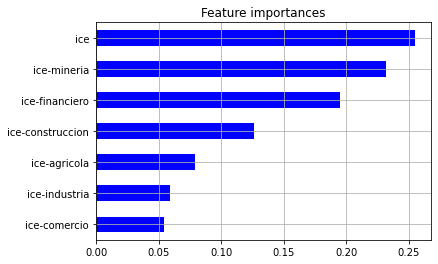

In [39]:
indice = 'ICE'
X_train, X_test, y_train = gen_X_train(vice)

model = xgb.XGBRegressor(colsample_bytree=parametros.loc[indice][0], 
                        eta=parametros.loc[indice][1],  
                        max_depth=parametros.loc[indice][2].astype(int), 
                        min_child_weight=parametros.loc[indice][3].astype(int), 
                        n_estimators=parametros.loc[indice][4].astype(int))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predicciones = predicciones.append(pd.DataFrame(y_pred, index=[indice], columns=['Imacec']))

importances_xgcl = pd.Series(model.feature_importances_, index=X_train.columns)
sorted_importances_xgcl = importances_xgcl.sort_values()
sorted_importances_xgcl.plot(kind='barh', color='blue')
plt.title('Feature importances')
plt.grid()
plt.show()

X_train shape: (209, 5) || X_test shape: (1, 5) || y_train shape: (209,)
[15:07:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


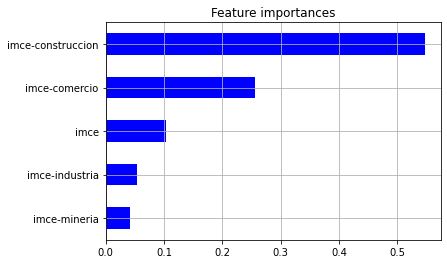

In [40]:
indice = 'IMCE'
X_train, X_test, y_train = gen_X_train(vimce)

model = xgb.XGBRegressor(colsample_bytree=parametros.loc[indice][0], 
                        eta=parametros.loc[indice][1],  
                        max_depth=parametros.loc[indice][2].astype(int), 
                        min_child_weight=parametros.loc[indice][3].astype(int), 
                        n_estimators=parametros.loc[indice][4].astype(int))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predicciones = predicciones.append(pd.DataFrame(y_pred, index=[indice], columns=['Imacec']))

importances_xgcl = pd.Series(model.feature_importances_, index=X_train.columns)
sorted_importances_xgcl = importances_xgcl.sort_values()
sorted_importances_xgcl.plot(kind='barh', color='blue')
plt.title('Feature importances')
plt.grid()
plt.show()

X_train shape: (204, 12) || X_test shape: (1, 12) || y_train shape: (204,)
[15:07:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


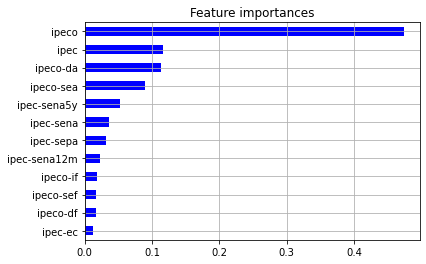

In [41]:
indice = 'Consumidores'
X_train, X_test, y_train = gen_X_train(vconsumidores)

model = xgb.XGBRegressor(colsample_bytree=parametros.loc[indice][0], 
                        eta=parametros.loc[indice][1],  
                        max_depth=parametros.loc[indice][2].astype(int), 
                        min_child_weight=parametros.loc[indice][3].astype(int), 
                        n_estimators=parametros.loc[indice][4].astype(int))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predicciones = predicciones.append(pd.DataFrame(y_pred, index=[indice], columns=['Imacec']))

importances_xgcl = pd.Series(model.feature_importances_, index=X_train.columns)
sorted_importances_xgcl = importances_xgcl.sort_values()
sorted_importances_xgcl.plot(kind='barh', color='blue')
plt.title('Feature importances')
plt.grid()
plt.show()

X_train shape: (189, 12) || X_test shape: (1, 12) || y_train shape: (189,)
[15:07:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


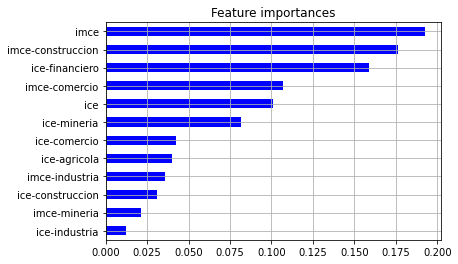

In [42]:
indice = 'Empresarios'
X_train, X_test, y_train = gen_X_train(vempresarios)

model = xgb.XGBRegressor(colsample_bytree=parametros.loc[indice][0], 
                        eta=parametros.loc[indice][1],  
                        max_depth=parametros.loc[indice][2].astype(int), 
                        min_child_weight=parametros.loc[indice][3].astype(int), 
                        n_estimators=parametros.loc[indice][4].astype(int))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predicciones = predicciones.append(pd.DataFrame(y_pred, index=[indice], columns=['Imacec']))

importances_xgcl = pd.Series(model.feature_importances_, index=X_train.columns)
sorted_importances_xgcl = importances_xgcl.sort_values()
sorted_importances_xgcl.plot(kind='barh', color='blue')
plt.title('Feature importances')
plt.grid()
plt.show()

X_train shape: (189, 24) || X_test shape: (1, 24) || y_train shape: (189,)
[15:07:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


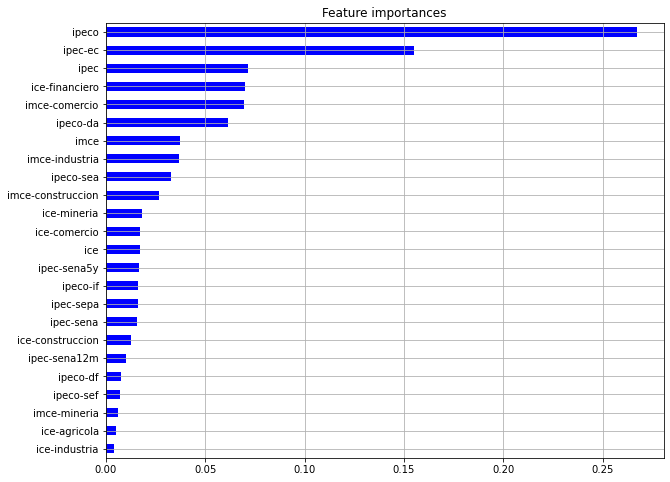

In [43]:
indice = 'Todos'
X_train, X_test, y_train = gen_X_train(X_train0.columns)

model = xgb.XGBRegressor(colsample_bytree=parametros.loc[indice][0], 
                        eta=parametros.loc[indice][1],  
                        max_depth=parametros.loc[indice][2].astype(int), 
                        min_child_weight=parametros.loc[indice][3].astype(int), 
                        n_estimators=parametros.loc[indice][4].astype(int))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predicciones = predicciones.append(pd.DataFrame(y_pred, index=[indice], columns=['Imacec']))

importances_xgcl = pd.Series(model.feature_importances_, index=X_train.columns)
sorted_importances_xgcl = importances_xgcl.sort_values()
sorted_importances_xgcl.plot(kind='barh', color='blue', figsize=(10,8))
plt.title('Feature importances')
plt.grid()
plt.show()

In [44]:
encuesta = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/BC%20EEE%20PIB%20e%20IMACEC.csv')
encuesta = encuesta[['IMACEC un mes atrás']].tail(1)
encuesta.columns = ['Imacec']
encuesta.index = ['Encuesta']
predicciones = predicciones.append(encuesta)

In [45]:
predicciones['Diferencia'] = predicciones - predicciones.loc['Encuesta']
predicciones['Diferencia'].loc['Encuesta'] = np.nan

In [46]:
predicciones.round(4)

,Imacec,Diferencia
IPECO,-4.6455,-6.2455
IPEC,-9.6941,-11.2941
ICE,0.7602,-0.8398
IMCE,2.1718,0.5718
Consumidores,-6.7920,-8.3920
Empresarios,0.0815,-1.5185
Todos,-5.2075,-6.8075
Encuesta,1.6000,NaN


In [47]:
print('Mayor predicción:')
print(predicciones['Imacec'].idxmax(), '\n')

print('Menor predicción:')
print(predicciones['Imacec'].idxmin(), '\n')

print('Mayor diferencia:')
print(abs(predicciones['Diferencia']).idxmax(), '\n')

print('Menor diferencia:')
print(abs(predicciones['Diferencia']).idxmin(), '\n')

Mayor predicción:
IMCE 

Menor predicción:
IPEC 

Mayor diferencia:
IPEC 

Menor diferencia:
IMCE 

